In [63]:
#!pip install plotly 
#!pip install bqplot
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go
from bokeh.charts import Histogram
from scipy import *
import pylab
from bqplot import *

# Read dataset
dateparse = lambda dates: pd.datetime.strptime('2010-12-01 08:34:00', '%Y-%m-%d %H:%M:%S')
df=pd.read_csv('ecommerce-data.csv',encoding='latin1',parse_dates=['InvoiceDate'],date_parser=dateparse)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:34:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:34:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:34:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:34:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:34:00,3.39,17850.0,United Kingdom


In [64]:
#Create computed year and month dimension    #? why dt work
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Sales']= df['InvoiceDate'].dt.year
df['Month']= df['InvoiceDate'].dt.month
df['Sales'] =df['Quantity'] * df['UnitPrice']
df['YearMonth'] = df['InvoiceDate'].map(lambda x: 100*x.year + x.month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:34:00,2.55,17850.0,United Kingdom,15.30,12,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:34:00,3.39,17850.0,United Kingdom,20.34,12,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:34:00,2.75,17850.0,United Kingdom,22.00,12,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:34:00,3.39,17850.0,United Kingdom,20.34,12,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:34:00,3.39,17850.0,United Kingdom,20.34,12,201012


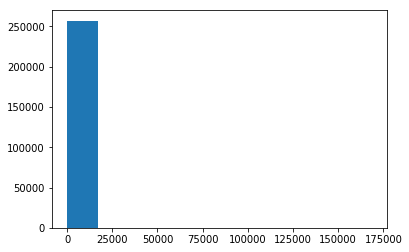

In [66]:
# check the sale distribution

#df = df[df['StockCode'].str.contains("71053","84406B")]
df = df.loc[df['Sales'] > 0 ]
#sales = df[['StockCode','Sales']]
#sales = sales.groupby(['StockCode']).sum()
sales = df['Sales']
plt.hist(sales) 
plt.show()
#print (sales.groupby(['StockCode']).sum())


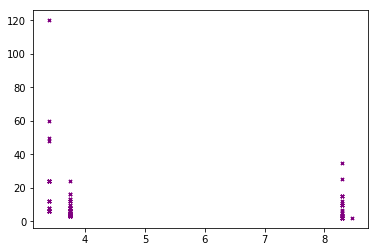

In [21]:
#plot unit vs price
# Should be by product
plt.scatter(x = df['UnitPrice'], y = df['Quantity'],
           color = 'purple',
           marker = 'x', s = 10
           )
plt.show()

TypeError: 'DataFrame' object is not callable

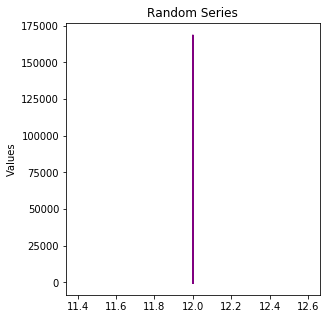

In [53]:
# Time series
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Month'],df['Sales'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

#a= df(df['Sales'],df['Sales'])
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.show()

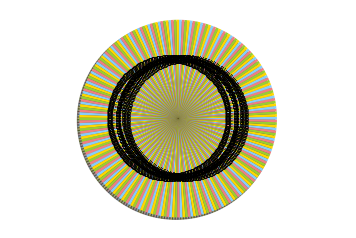

In [33]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = len(df['StockCode'])  # explode 1st slice

plt.pie(df['StockCode'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [51]:
df['YearMonth'].unique

<bound method Series.unique of 0         201012
1         201012
2         201012
3         201012
4         201012
5         201012
6         201012
7         201012
8         201012
9         201012
10        201012
11        201012
12        201012
13        201012
14        201012
15        201012
16        201012
17        201012
18        201012
19        201012
20        201012
21        201012
22        201012
23        201012
24        201012
25        201012
26        201012
27        201012
28        201012
29        201012
           ...  
541879    201012
541880    201012
541881    201012
541882    201012
541883    201012
541884    201012
541885    201012
541886    201012
541887    201012
541888    201012
541889    201012
541890    201012
541891    201012
541892    201012
541893    201012
541894    201012
541895    201012
541896    201012
541897    201012
541898    201012
541899    201012
541900    201012
541901    201012
541902    201012
541903    201012
541904    201012
